In [1]:
#--------------------------------------------------Parkinsons Disease-------------------------------------------------------

import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
#load the dataset :-

df = pd.read_excel("C:/Users/91801/Desktop/Retail_shop/Multiple Disease Prediction/dataset/parkinsons.xlsx")
df.drop_duplicates()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
#change the column name to smallcapse

df.columns = df.columns.str.lower()

In [4]:
df.columns = df.columns.str.replace(":","_")

In [5]:
df.columns = df.columns.str.replace(r"\(.*\)", "", regex=True)

In [6]:
#change the value

df["status"] = df["status"].apply(lambda val:2 if val == 1 else 3)

In [7]:
#descriptive analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          195 non-null    object 
 1   mdvp_fo       195 non-null    float64
 2   mdvp_fhi      195 non-null    float64
 3   mdvp_flo      195 non-null    float64
 4   mdvp_jitter   195 non-null    float64
 5   mdvp_jitter   195 non-null    float64
 6   mdvp_rap      195 non-null    float64
 7   mdvp_ppq      195 non-null    float64
 8   jitter_ddp    195 non-null    float64
 9   mdvp_shimmer  195 non-null    float64
 10  mdvp_shimmer  195 non-null    float64
 11  shimmer_apq3  195 non-null    float64
 12  shimmer_apq5  195 non-null    float64
 13  mdvp_apq      195 non-null    float64
 14  shimmer_dda   195 non-null    float64
 15  nhr           195 non-null    float64
 16  hnr           195 non-null    float64
 17  status        195 non-null    int64  
 18  rpde          195 non-null    

In [8]:
df.describe()

,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,2.246154,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,2.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,2.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,2.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,2.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,3.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


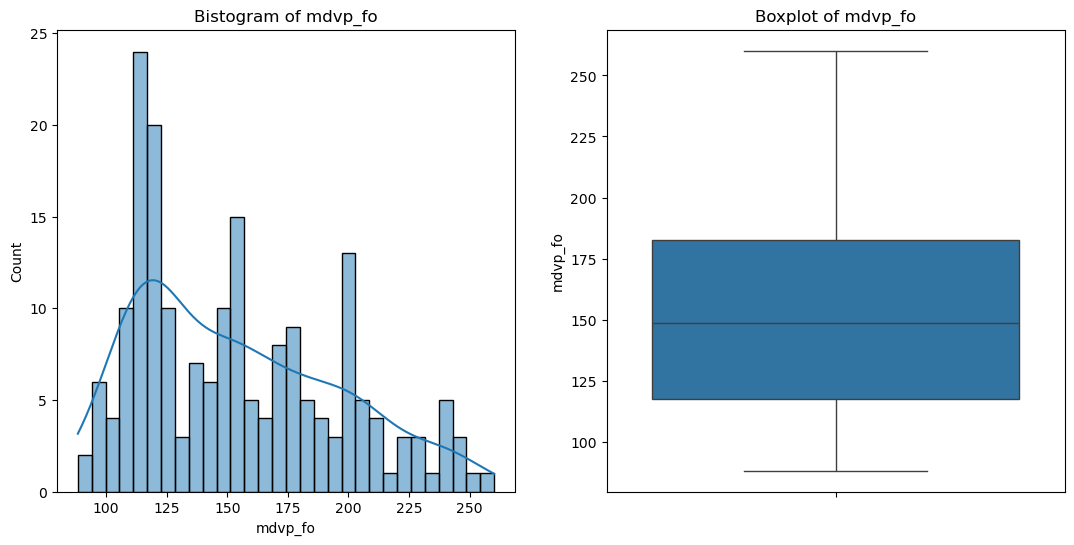

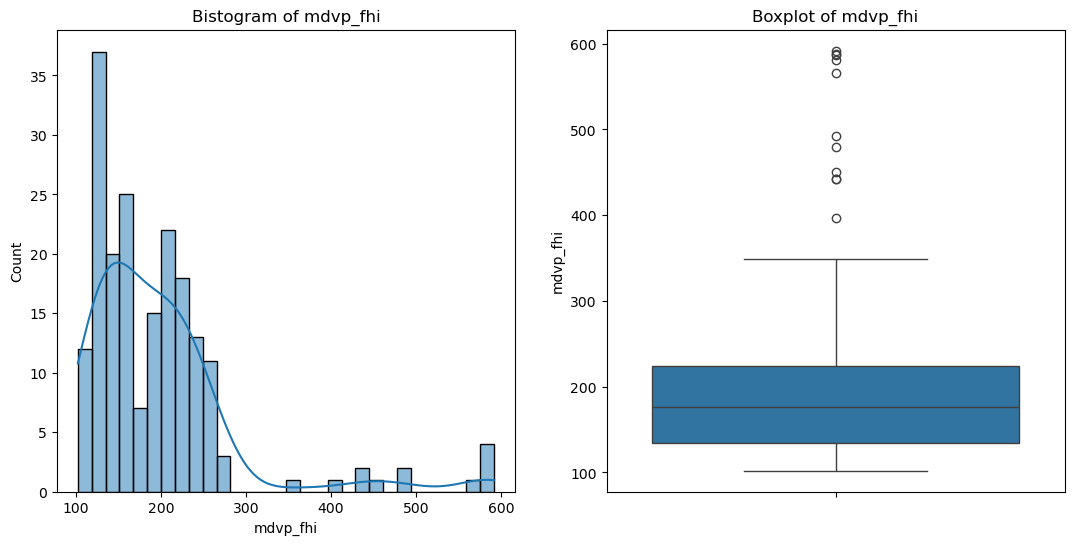

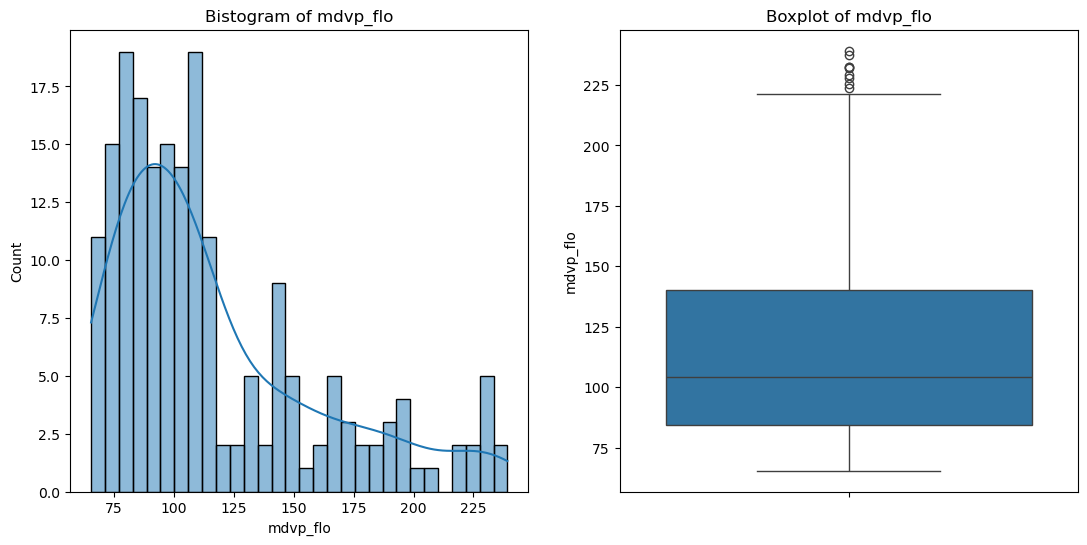

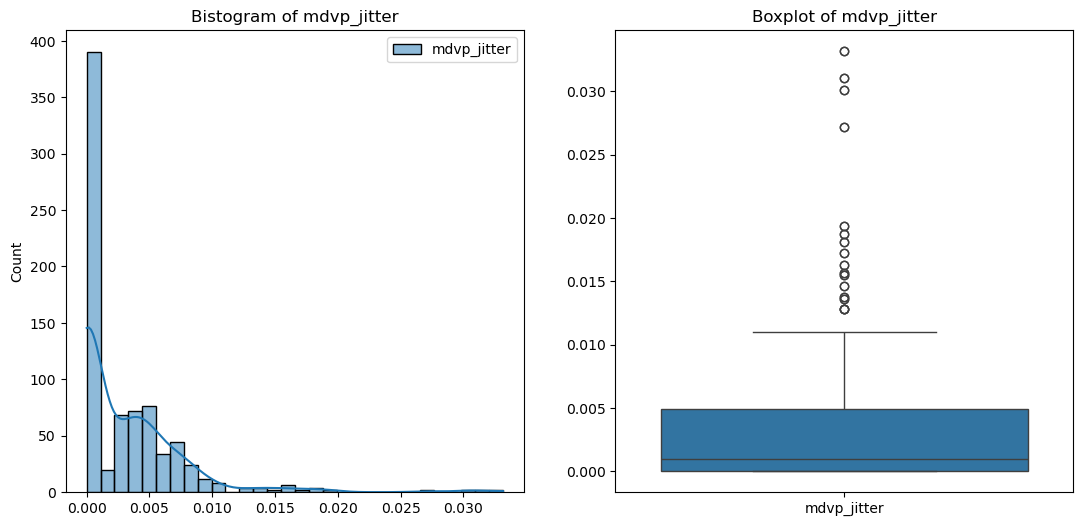

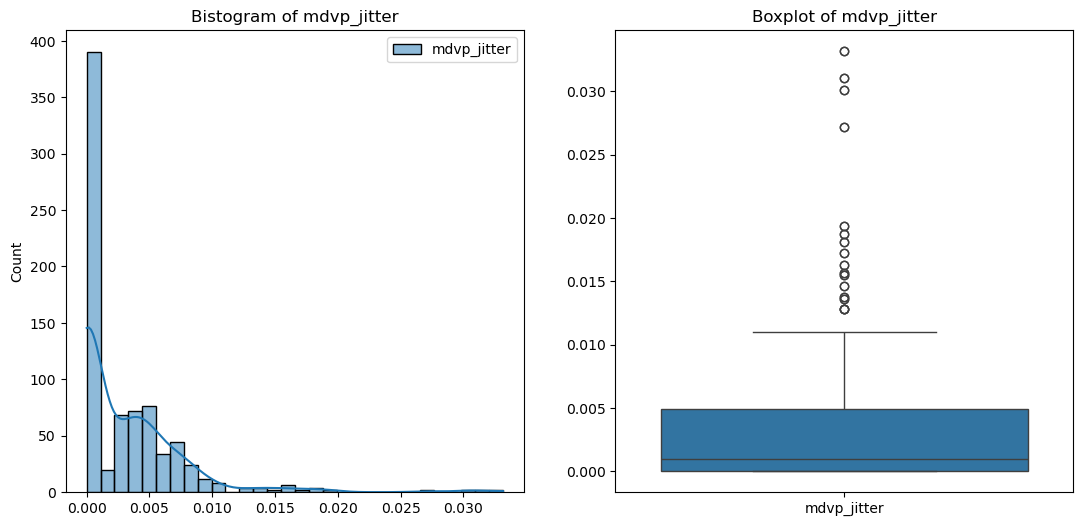

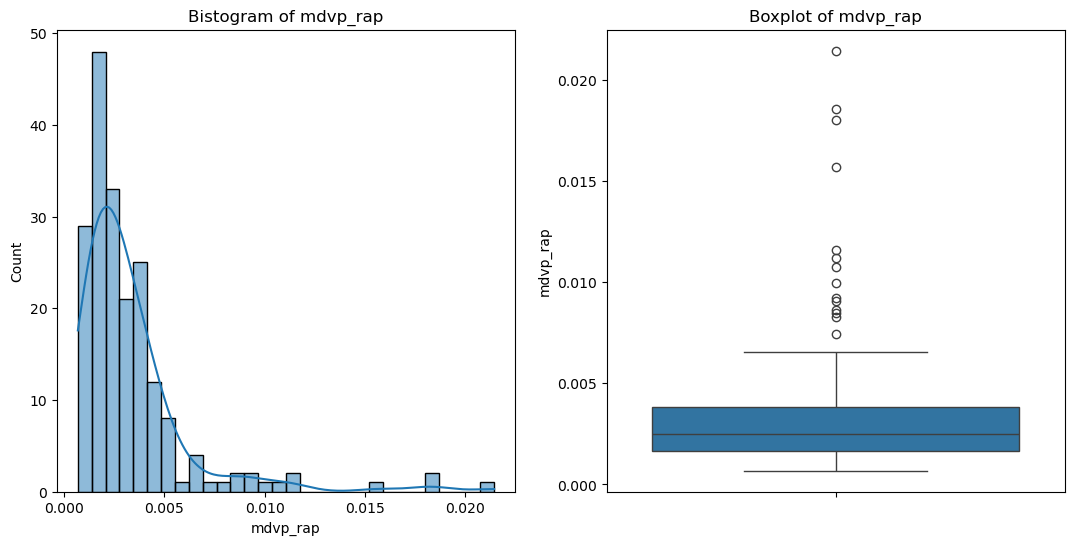

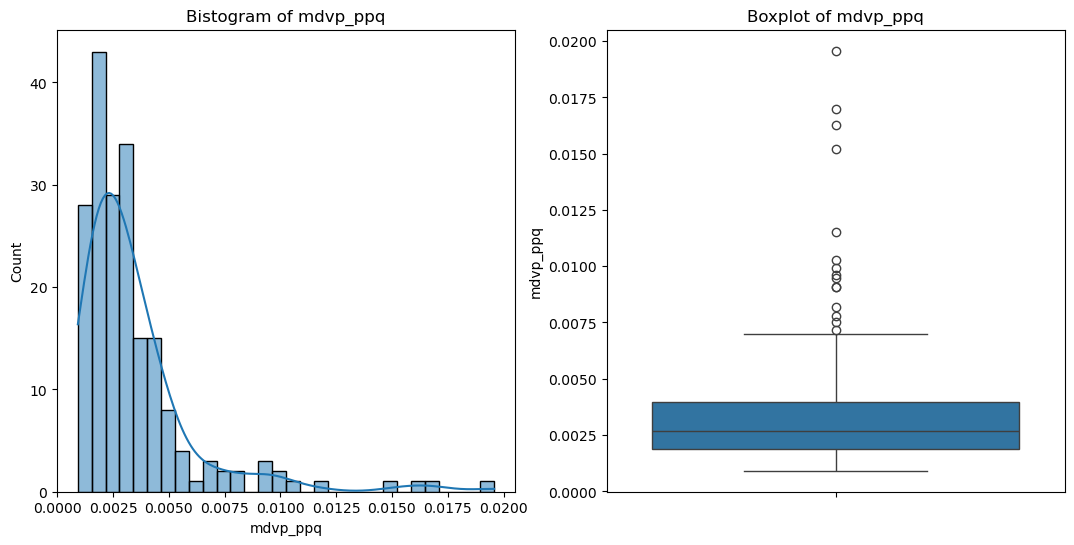

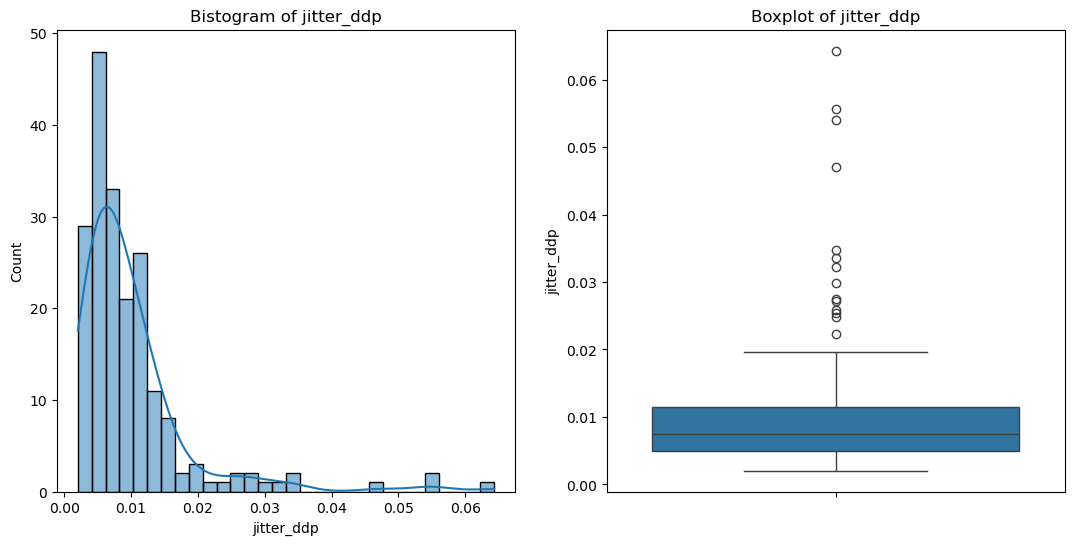

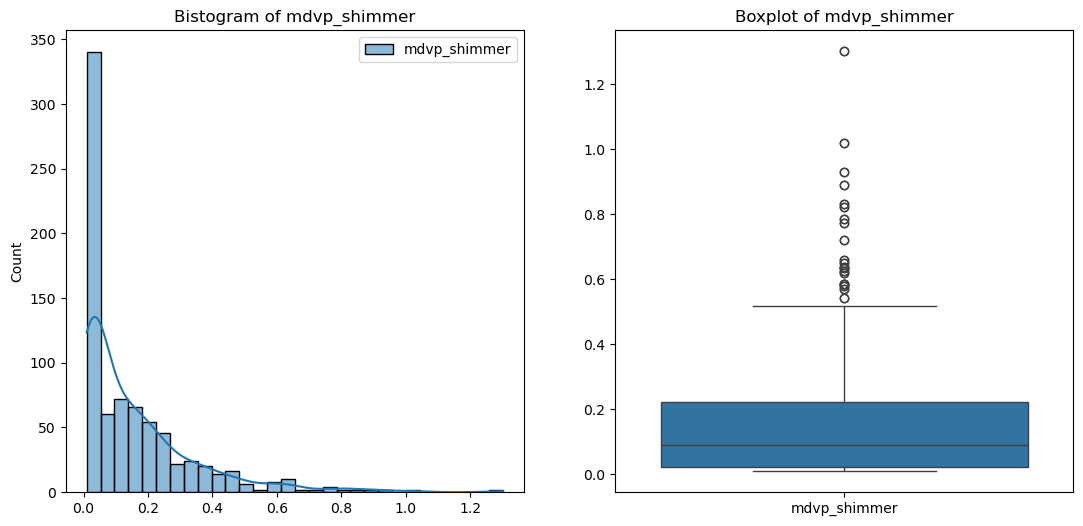

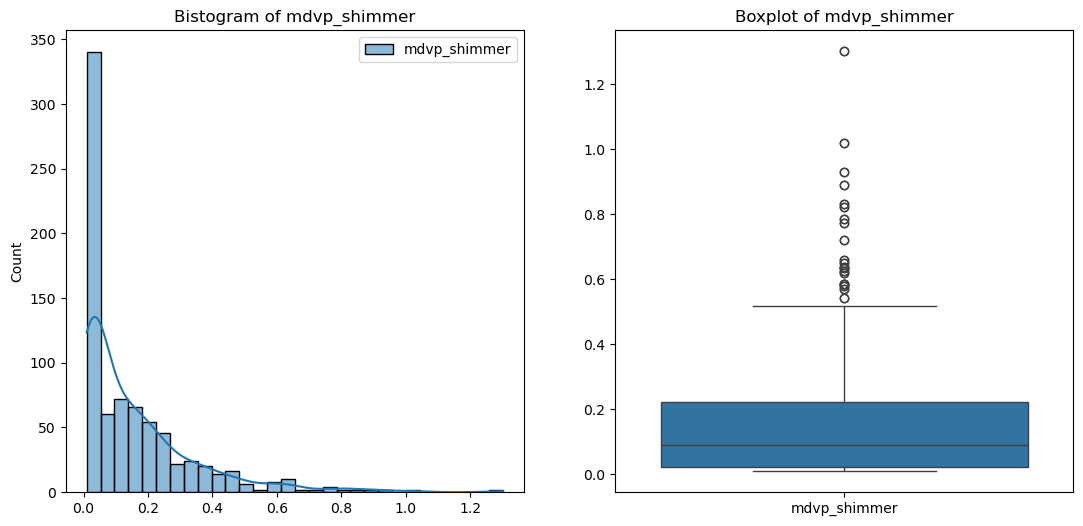

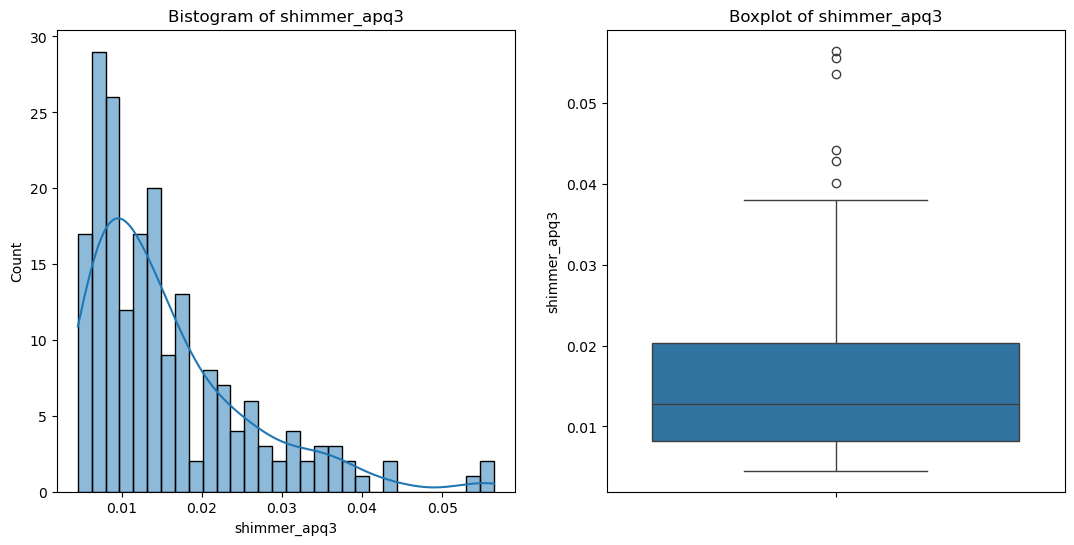

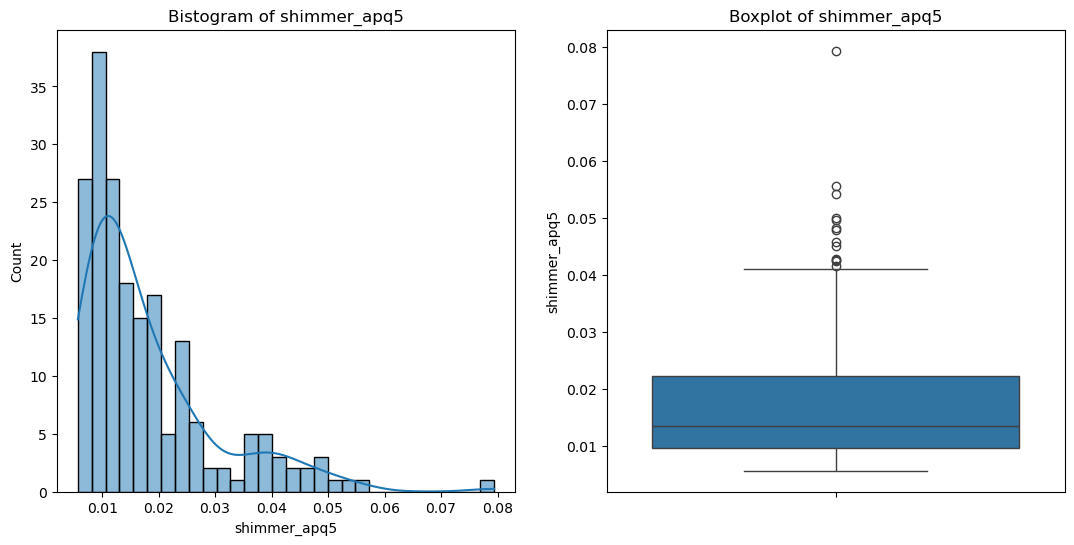

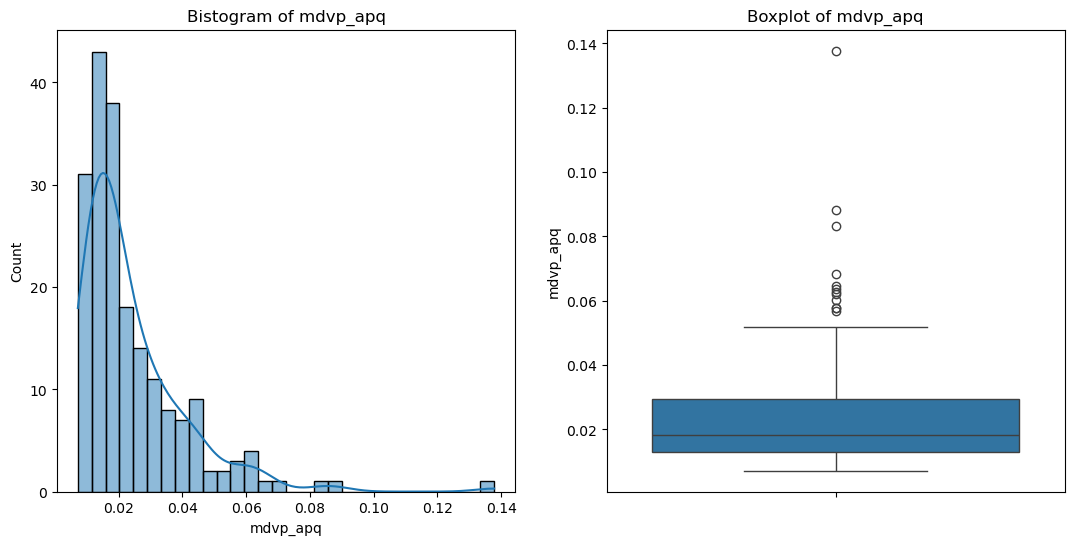

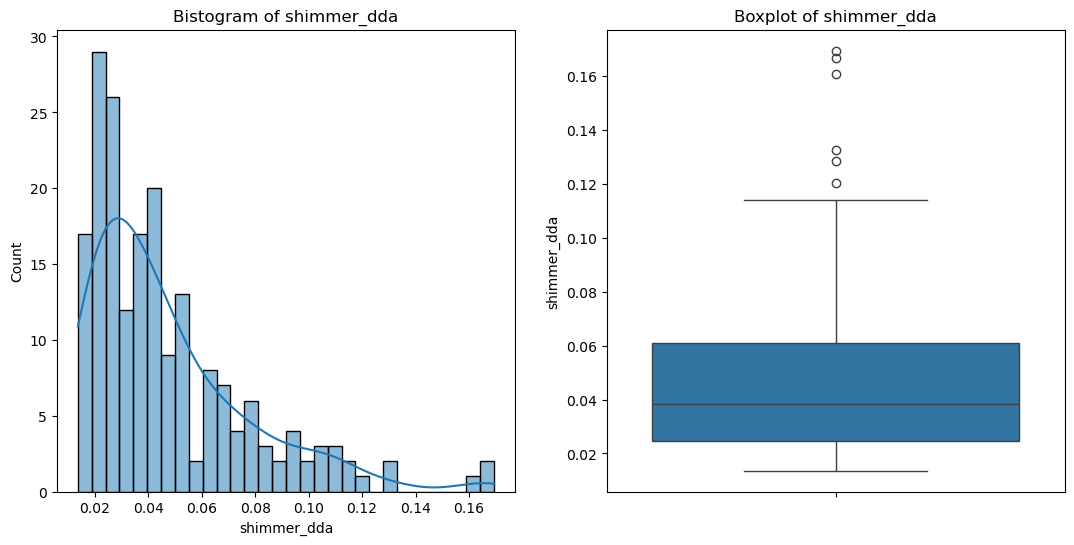

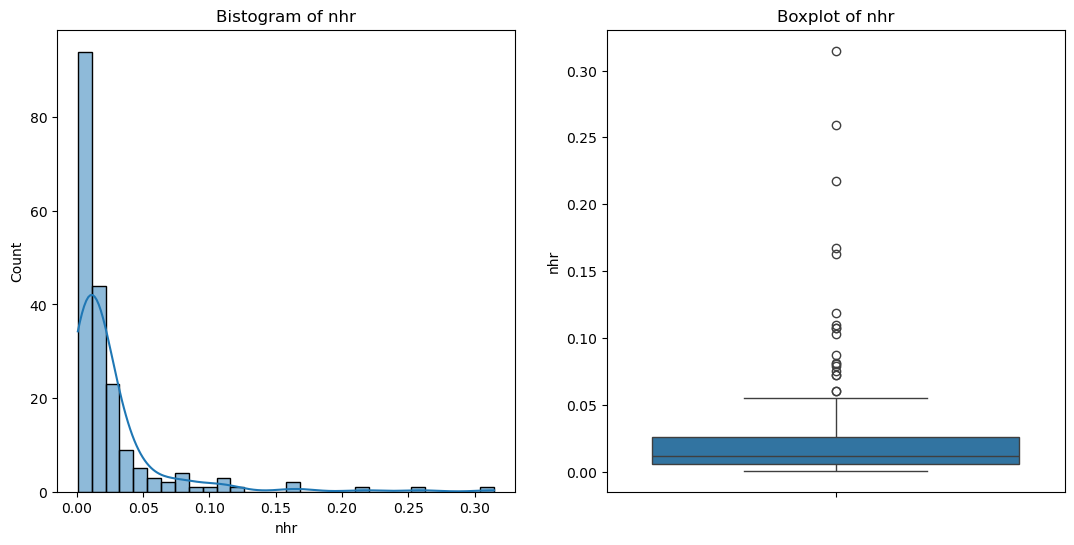

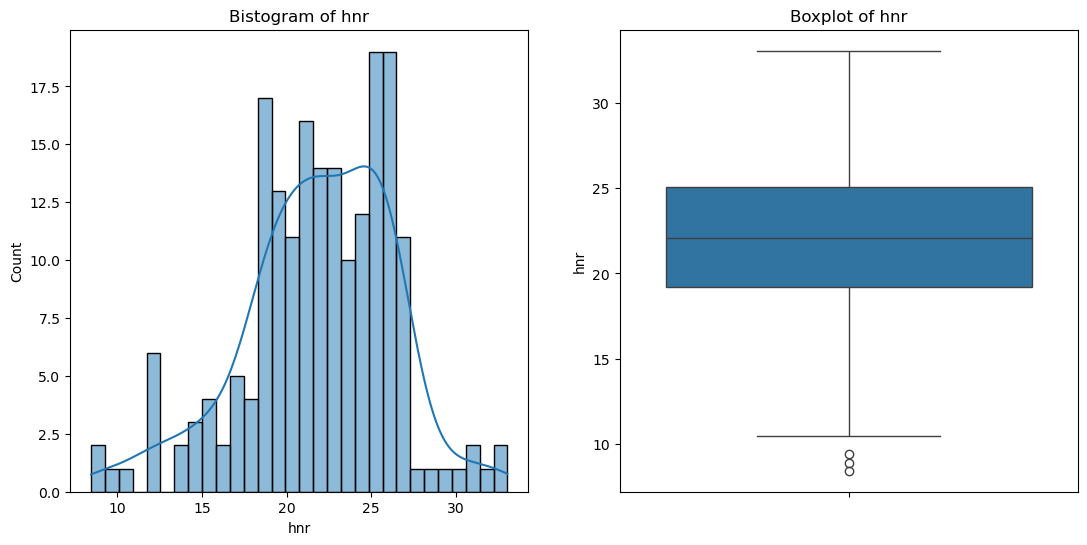

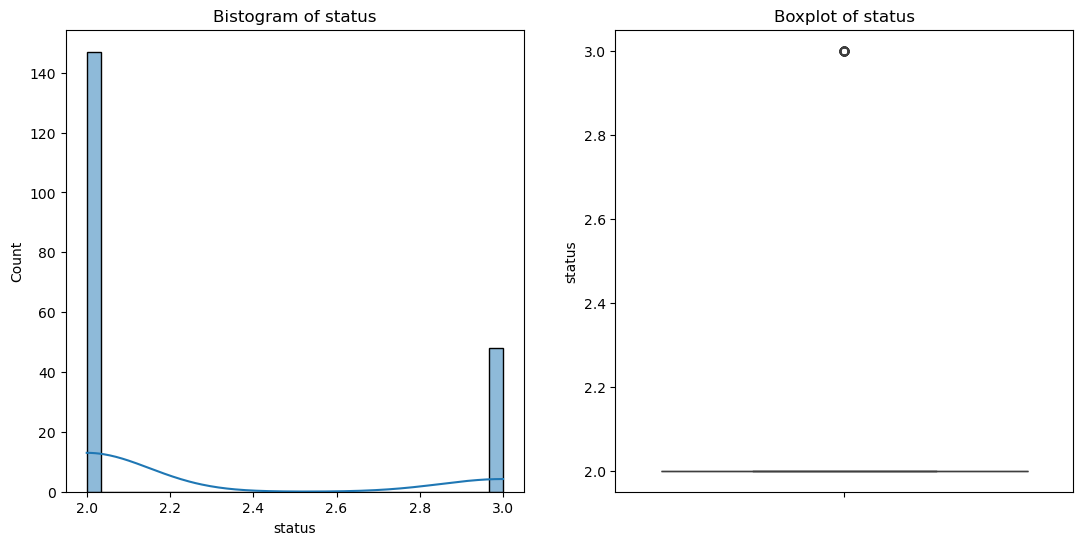

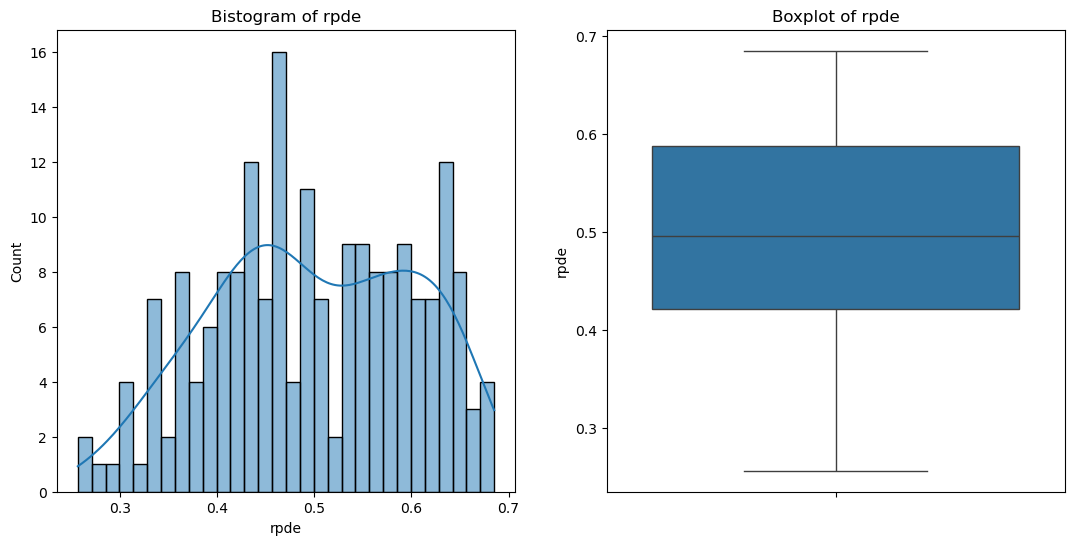

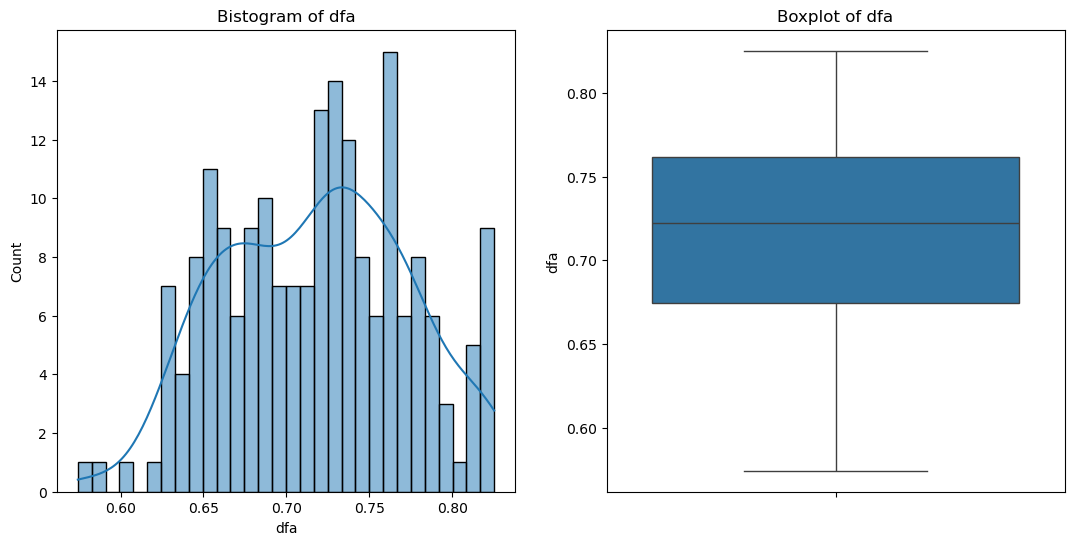

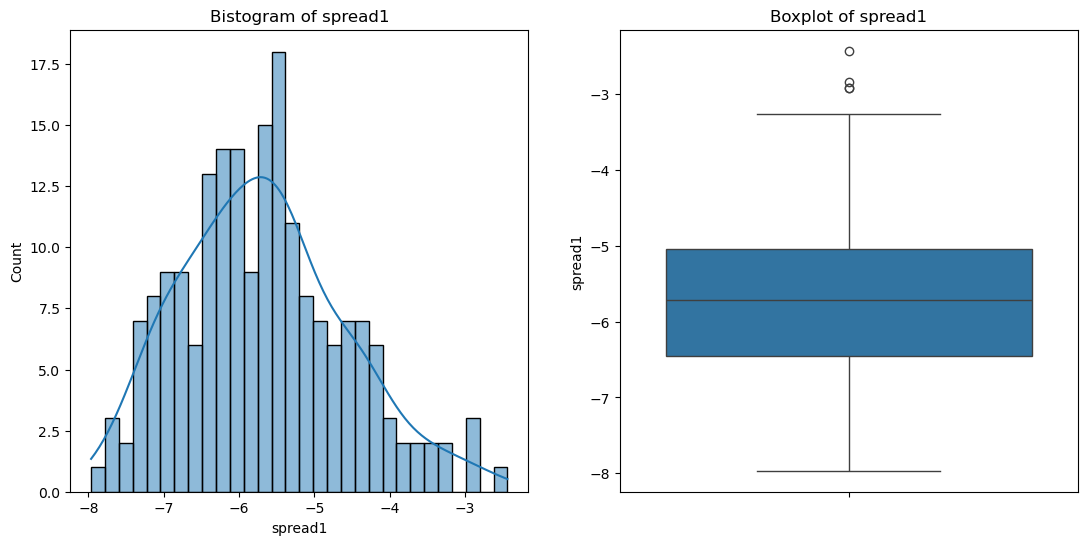

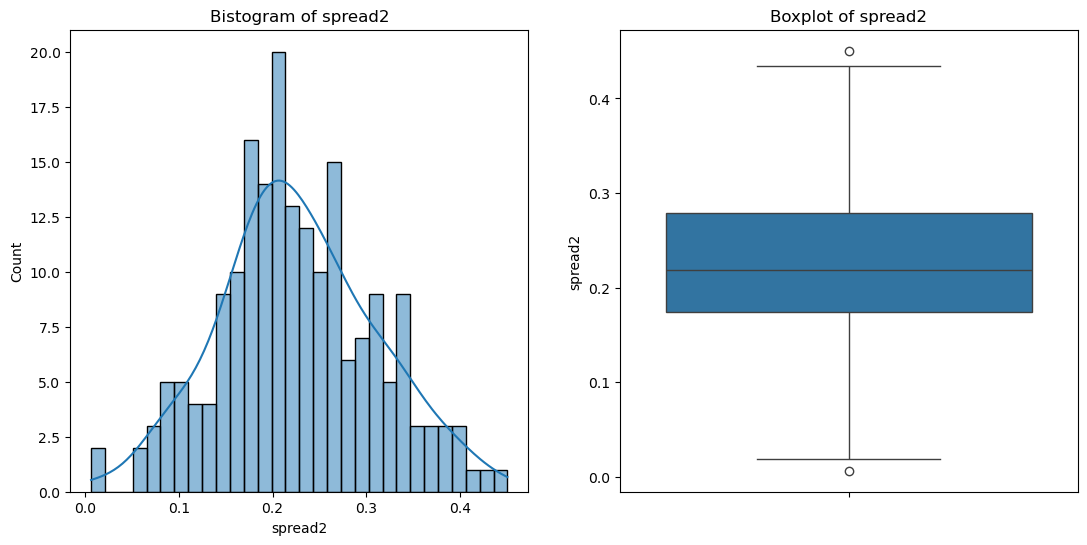

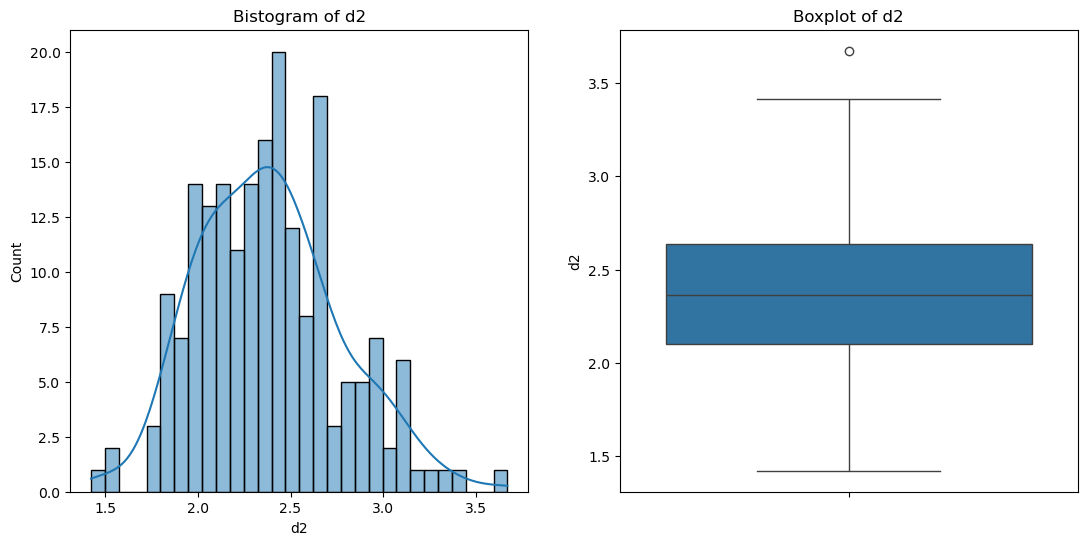

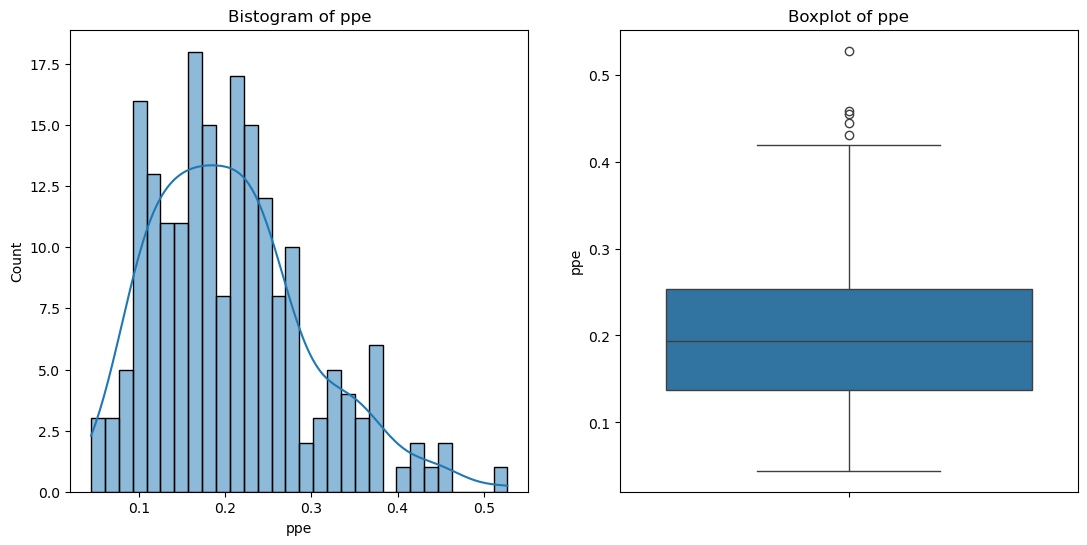

In [9]:
#----------------------------------------------EDA (Exploratory Data analysis)------------------------------------------------

num_features = df.select_dtypes(include="number")

for col in num_features:
    plt.figure(figsize=(13,6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Bistogram of {col}")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    
    plt.show()

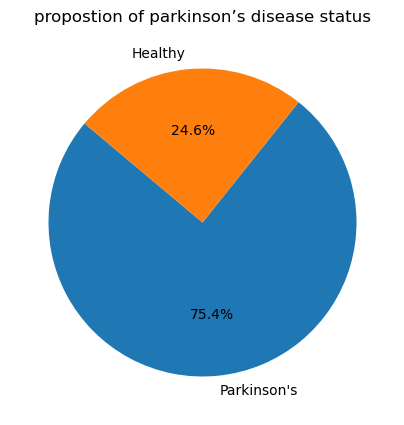

In [10]:
status_counts = df["status"].value_counts()

labels = ["Parkinson's", "Healthy"]

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(status_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("propostion of parkinson’s disease status")
plt.show()

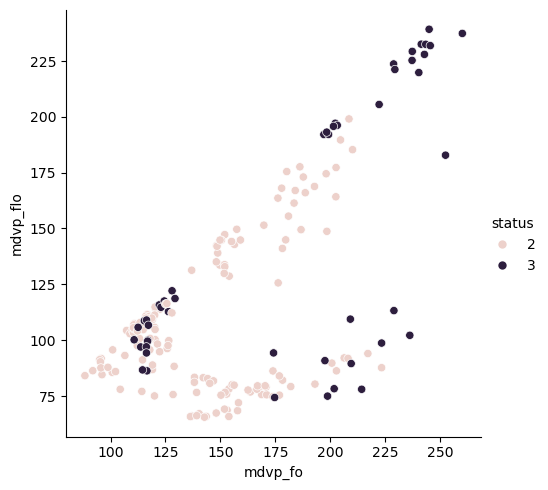

In [11]:
sns.relplot(data=df, x="mdvp_fo", y="mdvp_flo", hue="status")

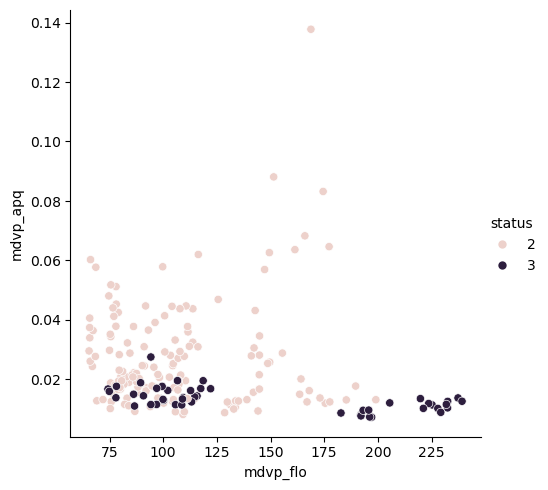

In [12]:
sns.relplot(data=df, x="mdvp_flo", y="mdvp_apq", hue="status")

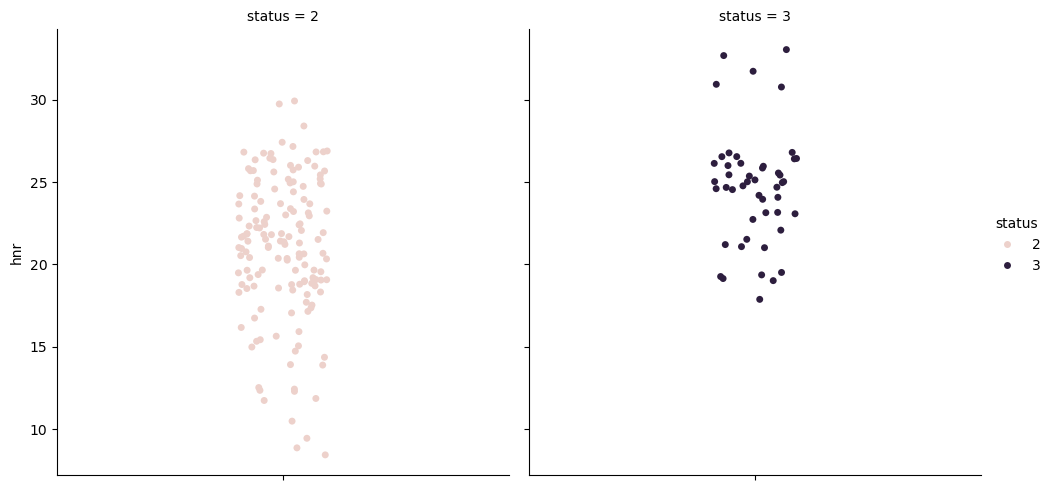

In [13]:
sns.catplot(data=df, y="hnr", hue="status", col="status")

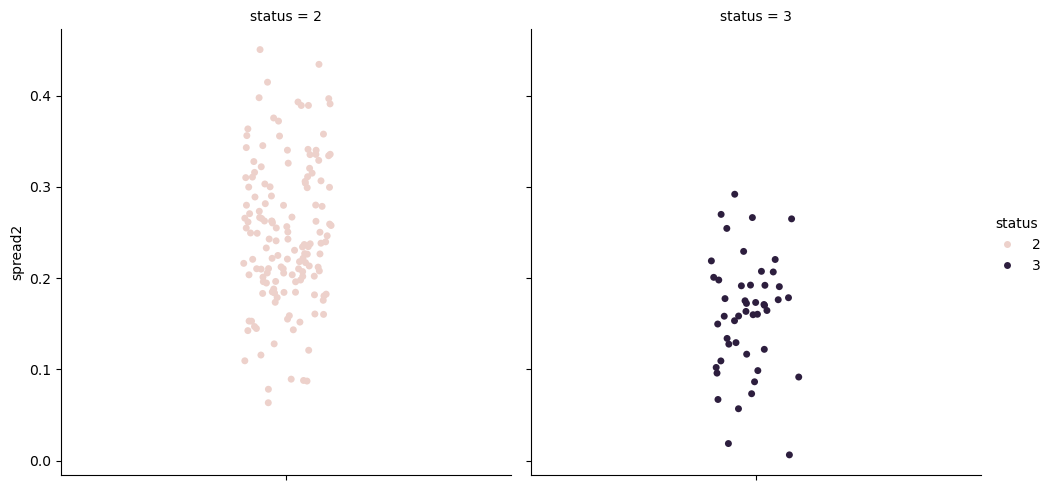

In [14]:
sns.catplot(data=df, y="spread2", hue="status", col="status")

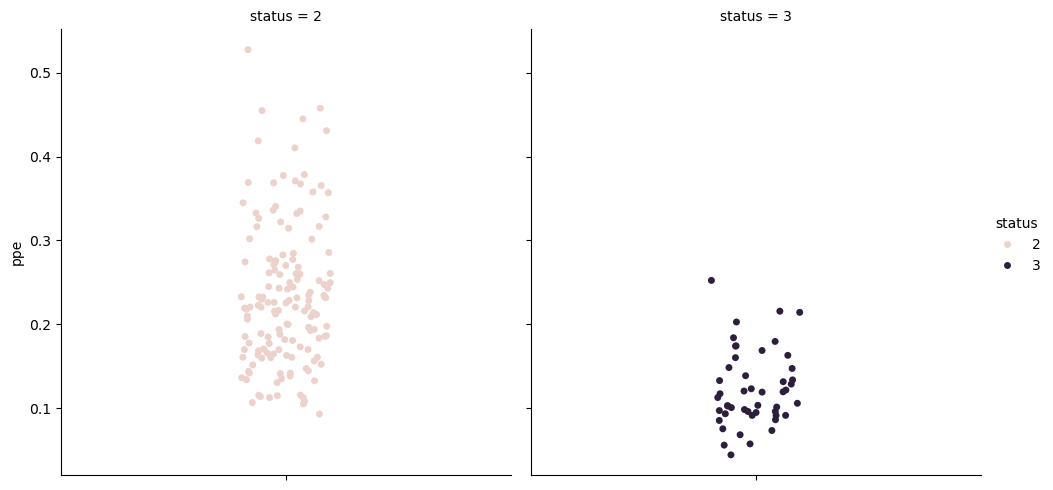

In [15]:
sns.catplot(data=df, y="ppe", hue="status", col="status")

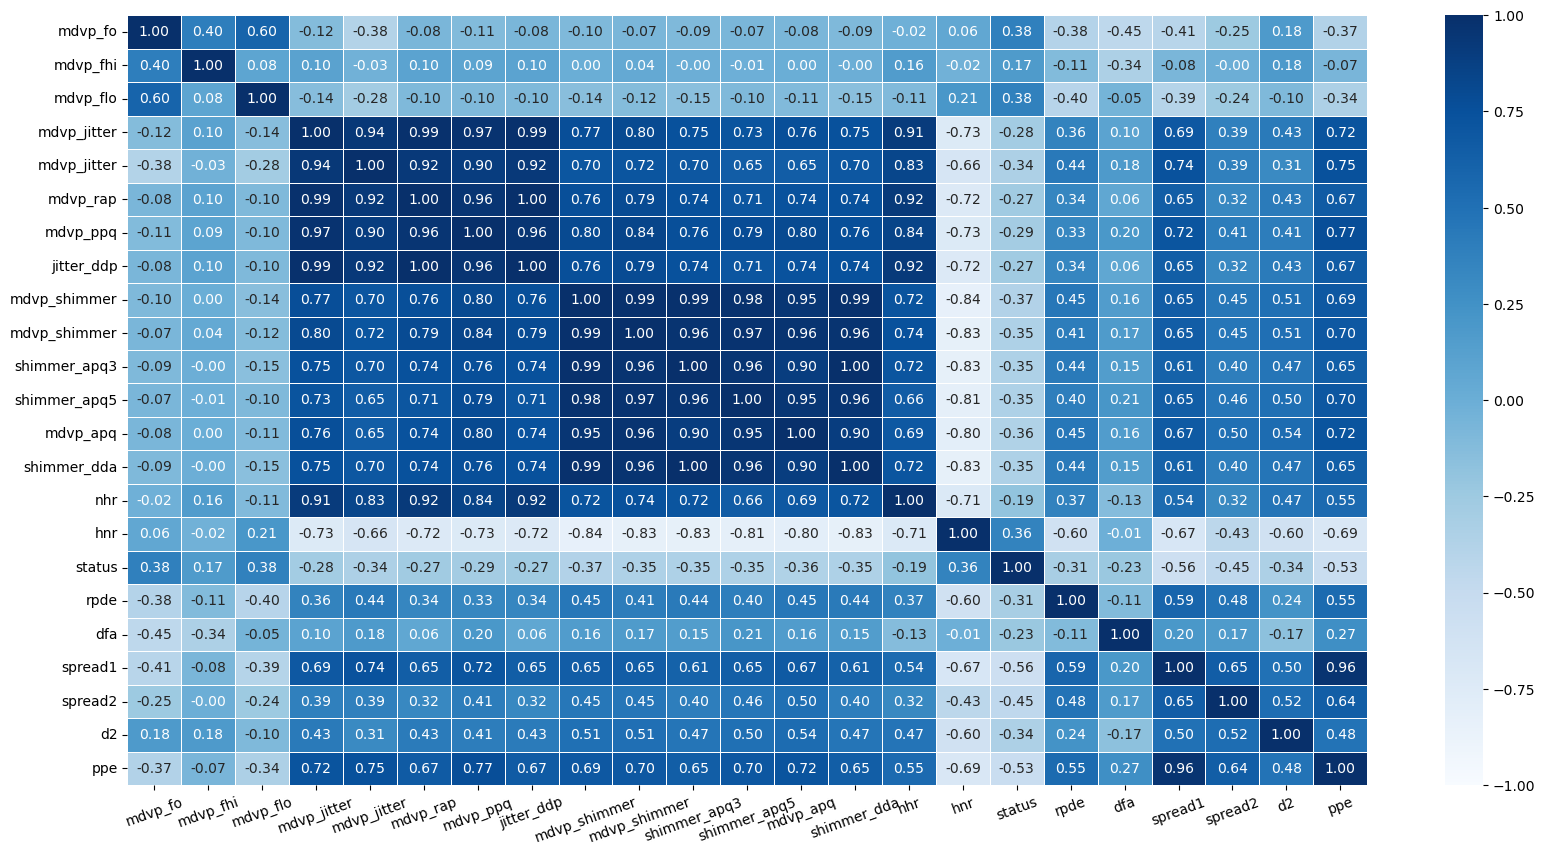

In [16]:
plt.figure(figsize=(20, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Blues", fmt=".2f",vmin=-1, vmax=1, linewidths=0.5, linecolor="white")
plt.xticks(rotation=20)
plt.show()

In [17]:
#----------------------------------------------------data prproccessing------------------------------------------------------

#handle missing values :-
df.isnull().sum()

name            0
mdvp_fo         0
mdvp_fhi        0
mdvp_flo        0
mdvp_jitter     0
mdvp_jitter     0
mdvp_rap        0
mdvp_ppq        0
jitter_ddp      0
mdvp_shimmer    0
mdvp_shimmer    0
shimmer_apq3    0
shimmer_apq5    0
mdvp_apq        0
shimmer_dda     0
nhr             0
hnr             0
status          0
rpde            0
dfa             0
spread1         0
spread2         0
d2              0
ppe             0
dtype: int64

In [18]:
#feature selection :-

x = df[["mdvp_fo", "mdvp_flo", "shimmer_apq5", "mdvp_apq", "hnr", "spread2", "ppe"]]
y = df["status"]

In [19]:
# handle class imbalance using smote :-

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

C:\Users\91801\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state=42, stratify=y_res)

In [21]:
# feature scaling

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
model = RandomForestClassifier()

In [23]:
model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [24]:
y_pred = model.predict(x_test_scaled)

In [25]:
#check metrics scores to evaluate :-

precision = precision_score(y_test, y_pred, pos_label=2)
recall = recall_score(y_test, y_pred, pos_label=2)
f1 = f1_score(y_test, y_pred, pos_label=2)
confusion = confusion_matrix(y_test, y_pred)

In [26]:
print(f"precision score : {precision:.2f} \nrecall score: {recall:.2f} \nf1 score : {f1:.2f}")
confusion

precision score : 0.97 
recall score: 0.89 
f1 score : 0.93


array([[33,  4],
       [ 1, 36]], dtype=int64)

In [27]:
#cross valid score :-

cv_score = cross_val_score(model, x_train_scaled, y_train, cv=5)
print("Cross-validation mean score :", cv_score.mean())

Cross-validation mean score : 0.9454545454545455


In [28]:
#dump and create file for model

joblib.dump(model, "parkinsons_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [29]:
# Compute metrics
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, pos_label=2)
recall = recall_score(y_test, y_pred, pos_label=2)
f1 = f1_score(y_test, y_pred, pos_label=2)

print(f"accuarcy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

accuarcy: 0.93
Precision: 0.97
Recall: 0.89
F1 Score: 0.93
